Informática II

Parcial II: Computación numérica en python
Universidad de Antioquia - Bioingeniería

Nombre: Julian David Goez 

Cédula: 1035879371

Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando.

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.

Debe permitir al usuario ingresar los límites del eje x a graficar.

En este caso el gráfico es datos vs tiempo

Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

In [1]:
#Importar librerias

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd


Información de las señales:
Archivo 1:
Número de puntos de tiempo: 63196
Número de canales: 8
Forma de la señal:
Canal 1: (63196,)
Canal 2: (63196,)
Canal 3: (63196,)
Canal 4: (63196,)
Canal 5: (63196,)
Canal 6: (63196,)
Canal 7: (63196,)
Canal 8: (63196,)

Archivo 2:
Número de puntos de tiempo: 57974
Número de canales: 8
Forma de la señal:
Canal 1: (57974,)
Canal 2: (57974,)
Canal 3: (57974,)
Canal 4: (57974,)
Canal 5: (57974,)
Canal 6: (57974,)
Canal 7: (57974,)
Canal 8: (57974,)

Graficando todos los canales:


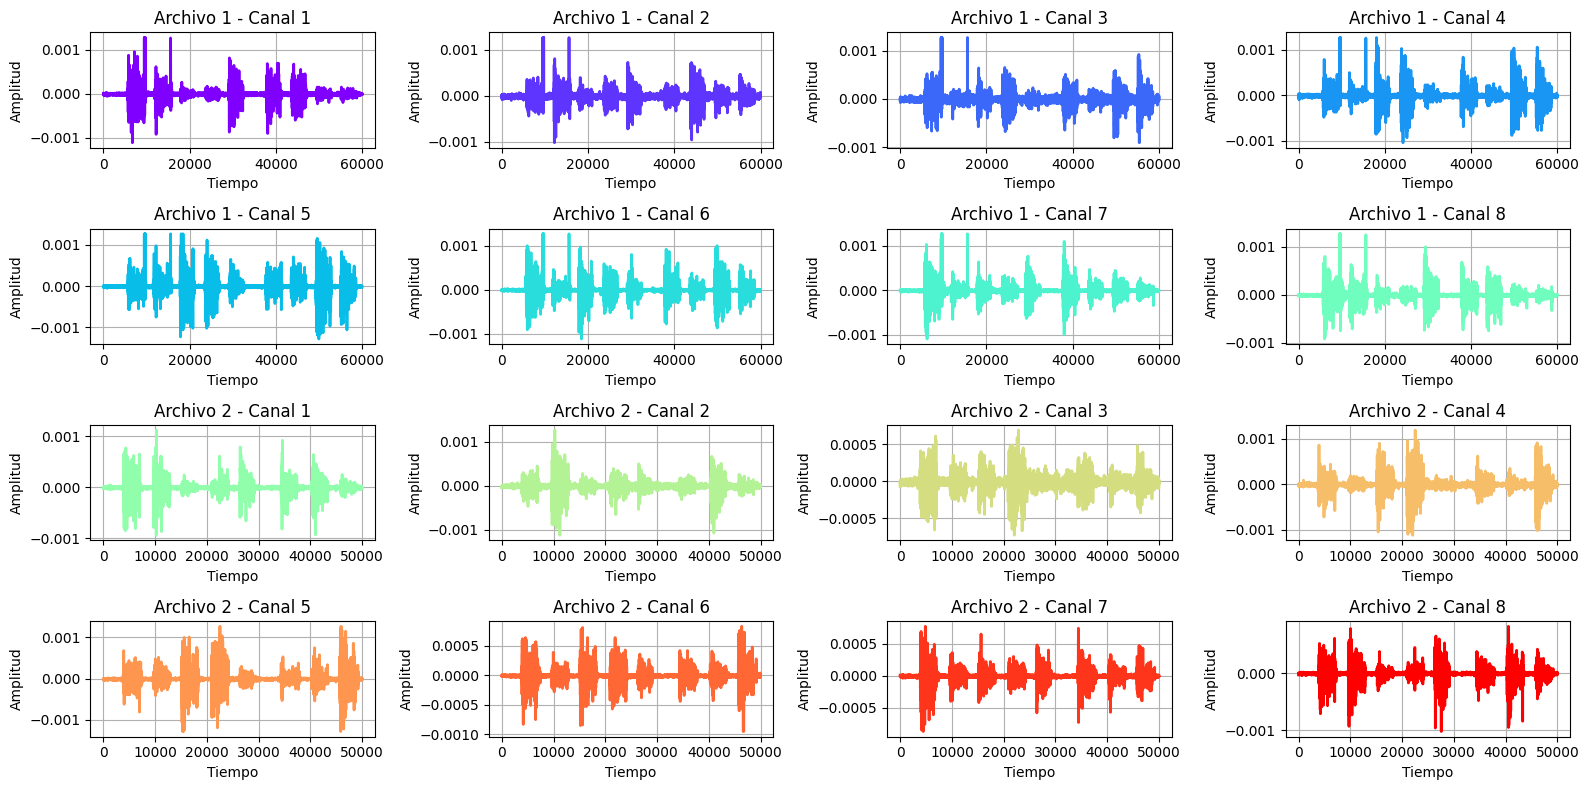

Archivo 1:
Valor máximo de amplitud del canal 1: 0.00127
Valor máximo de amplitud del canal 2: 0.00127
Valor máximo de amplitud del canal 3: 0.00127
Valor máximo de amplitud del canal 4: 0.00127
Valor máximo de amplitud del canal 5: 0.00127
Valor máximo de amplitud del canal 6: 0.00127
Valor máximo de amplitud del canal 7: 0.00127
Valor máximo de amplitud del canal 8: 0.00127

Archivo 2:
Valor máximo de amplitud del canal 1: 0.00112
Valor máximo de amplitud del canal 2: 0.00127
Valor máximo de amplitud del canal 3: 0.00069
Valor máximo de amplitud del canal 4: 0.00119
Valor máximo de amplitud del canal 5: 0.00127
Valor máximo de amplitud del canal 6: 0.00086
Valor máximo de amplitud del canal 7: 0.00077
Valor máximo de amplitud del canal 8: 0.00105


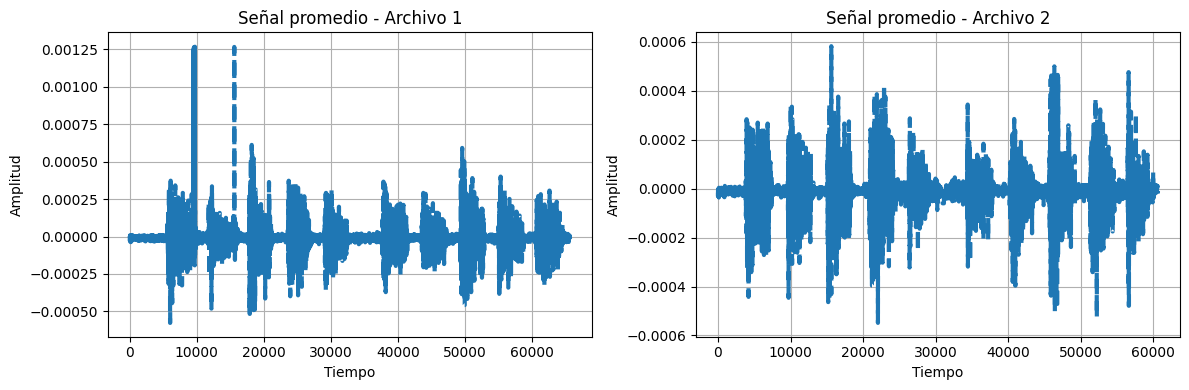

In [2]:
class EMGSenal:
    #Función de inicialización de la clase, recibe los dos archivos .mat mediante su ruta
    def __init__(self, ruta1, ruta2):
        #se cargan los archivos
        self.data1 = loadmat(ruta1)
        self.data2 = loadmat(ruta2)
        #Se extraen los datos del archivo, los vectores de tiempo y los canales
        self.canales1 = self.data1['datos']
        self.canales2 = self.data2['datos']
        self.tiempo1 = self.data1['tiempo'].squeeze() #Se convierte en 1D
        self.tiempo2 = self.data2['tiempo'].squeeze()
        self.numcanales1 = self.canales1.shape[0] #se extrae el numero de canales
        self.numcanales2 = self.canales2.shape[0]

    #Se define la función que va a mostrar la información 
    def mostrar_info(self):
        print("Archivo 1:")
        print(f"Número de puntos de tiempo: {len(self.tiempo1)}") #Se lee el numero de puntos de tiempo
        print(f"Número de canales: {self.numcanales1}") #Se lee el numero de canales
        print("Forma de la señal:")
        for i, canal in enumerate(self.canales1):
            print(f"Canal {i+1}: {canal.shape}") #Se imprime la información de cada canal
        
        print("\nArchivo 2:")
        print(f"Número de puntos de tiempo: {len(self.tiempo2)}")
        print(f"Número de canales: {self.numcanales2}")
        print("Forma de la señal:")
        for i, canal in enumerate(self.canales2):
            print(f"Canal {i+1}: {canal.shape}")

    #Este función grafica los canales de EMG de ambos archivos en subplots
    def graficar(self, x_lim=None, x1_lim=None): #Verifica que se hayan pasado los limites a graficar
        if self.numcanales1 % 2 != 0 or self.numcanales2 % 2 != 0:
            print("El número de canales de ambos archivos debe ser par.") #se verifica que el numero de canales sea par
            return
        #Se crea la figura según el numero de canales de los archivos
        num_col = self.numcanales1 // 2
        num_fil = self.numcanales2 // 2
        fig, axs = plt.subplots(num_fil, num_col, figsize=(16, 8))
        axs = axs.ravel()
        #genero la secuencia de colores
        colores = plt.cm.rainbow(np.linspace(0, 1, self.numcanales1 + self.numcanales2))

        #verifica que se haya pasado el limite del archivo 1
        if x_lim is not None:
            start, end = x_lim
            #crea el vector de tiempo con los limites
            time_indices1 = (self.tiempo1 >= start) & (self.tiempo1 <= end)
            time_slice1 = self.tiempo1[time_indices1]
            #Guarda los datos en esos limites
            data_slice1 = self.canales1[:, time_indices1]

            #Grafica cada uno de los canales 
            for i, canal in enumerate(data_slice1):
                axs[i].plot(time_slice1, canal, color=colores[i], linewidth=2)
                axs[i].set_title(f"Archivo 1 - Canal {i+1}")
                axs[i].set_xlabel("Tiempo")
                axs[i].set_ylabel("Amplitud")
                axs[i].grid()

        #Si no se pasan los limites, no grafica e imprime que hacen falta los limites        
        else:
            print("Debe ingresar los limites")

        #verifica que se haya pasado el limite del archivo 1
        if x1_lim is not None:
            start2,end2= x1_lim
            #crea el vector de tiempo con los limites del archivo 2
            time_indices2 = (self.tiempo2 >= start2) & (self.tiempo2 <= end2)
            time_slice2 = self.tiempo2[time_indices2]
            #Guarda los datos en esos limites
            data_slice2 = self.canales2[:, time_indices2]
            #Grafica el archivo 2
            for i, canal in enumerate(data_slice2, start=self.numcanales1):
                axs[i].plot(time_slice2, canal, color=colores[i], linewidth=2)
                axs[i].set_title(f"Archivo 2 - Canal {i+1-self.numcanales1}")
                axs[i].set_xlabel("Tiempo")
                axs[i].set_ylabel("Amplitud")
                axs[i].grid() 
        #Si no se pasaron los limites de este archivo, no se grafica y se imprime que hacen falta los límites        
        else:
            print("Debe ingresar los limites")

        #Grafico        
        plt.tight_layout()
        plt.show()

    #Esta función es la que saca la amplitud maáxima
    def amplitud_max(self):
        print("Archivo 1:")
        #saca la amplitud maxima de cada canal
        max_amplitudes = np.max(self.canales1, axis=1)
        for i, amp in enumerate(max_amplitudes):
            #La imprime para cada canal
            print(f"Valor máximo de amplitud del canal {i+1}: {amp}")
        
        print("\nArchivo 2:")
        max_amplitudes = np.max(self.canales2, axis=1)
        for i, amp in enumerate(max_amplitudes):
            print(f"Valor máximo de amplitud del canal {i+1}: {amp}")
    #Esta función es la que grafica el promedio de los canales de cada archivo 
    def graficar_promedio(self):
        #Saca el promedio
        prom_senal1 = np.mean(self.canales1, axis=0)
        prom_senal2 = np.mean(self.canales2, axis=0)
        #Creo la figura
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))
        #Grafico el archivo 1
        axs[0].plot(self.tiempo1, prom_senal1, linestyle='--', linewidth=3)
        axs[0].set_title("Señal promedio - Archivo 1")
        axs[0].set_xlabel("Tiempo")
        axs[0].set_ylabel("Amplitud")
        axs[0].grid()
        #Grafico el archivo 2 
        axs[1].plot(self.tiempo2, prom_senal2, linestyle='--', linewidth=3)
        axs[1].set_title("Señal promedio - Archivo 2")
        axs[1].set_xlabel("Tiempo")
        axs[1].set_ylabel("Amplitud")
        axs[1].grid()

        plt.tight_layout()
        plt.show()

# Ejemplo de uso
signal = EMGSenal("archivo1.mat", "archivo2.mat")

print("Información de las señales:")
signal.mostrar_info()

print("\nGraficando todos los canales:")
signal.graficar(x_lim=(0,60000), x1_lim=[0,50000])
signal.amplitud_max()
signal.graficar_promedio()


2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:
Frecuencia de la señal: 1 Hz.
Número de muestras: 1000.
Rango de amplitud: entre 1 y 5 unidades.
Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

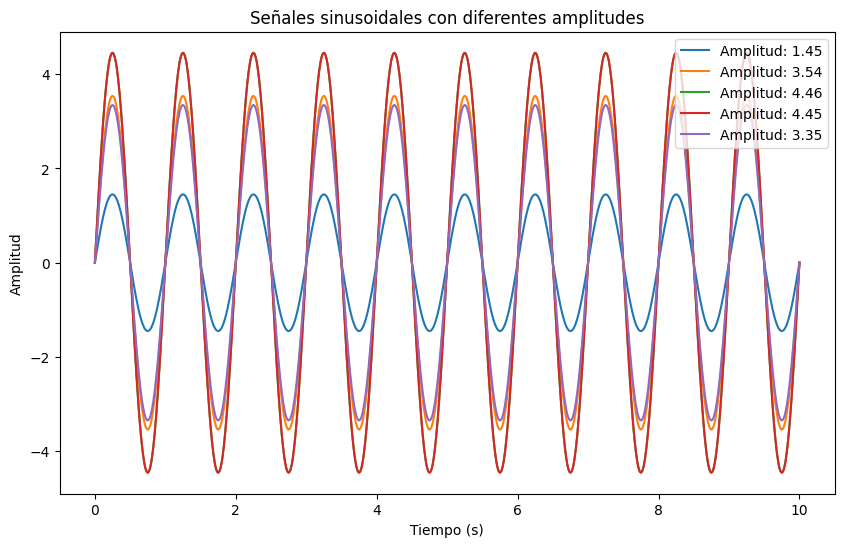

In [3]:
# Generar señales sinusoidales
frecuencia = 1  # Hz
num_muestras = 1000
tiempo = np.linspace(0, 10, num_muestras)  # 10 segundos de duración

amplitudes = np.random.uniform(1, 5, size=5)  # se crean las amplitudes aleatorias entre 1 y 5
#Se crea las diferentes señales senosoidal haciendo un for que recorre las diferentes amplitudes aleatorias
senales = [amplitud * np.sin(2 * np.pi * frecuencia * tiempo) for amplitud in amplitudes] 
# Se crea la figura
fig, ax = plt.subplots(figsize=(10, 6))
lineas = []
leyendas = []

#se  van graficando mediante un for las diferentes señales senosoidales creadas
for i, senal in enumerate(senales):
    linea, = ax.plot(tiempo, senal, label=f"Amplitud: {amplitudes[i]:.2f}")
    lineas.append(linea)
    leyendas.append(f"Amplitud: {amplitudes[i]:.2f}")

#Se agregan los ejes, las leyendas y el titulo
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Amplitud")
ax.set_title("Señales sinusoidales con diferentes amplitudes")
ax.legend(lineas, leyendas)
plt.show()

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas. Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas:
-Muestre las primeras filas del DataFrame para entender su estructura.
-Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
-Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
-Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

In [4]:

# Cargar datos desde el archivo CSV
datos = pd.read_csv('datos_dispositivos.csv')

# Mostrar primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(datos.head())

# Información básica del DataFrame
print("\nInformación básica del DataFrame:")
print(datos.info())

# Filtrar por clasificación de riesgo
riesgo_alto = datos[datos['Clasificacion_riesgo'] == 'Alto']
riesgo_moderado = datos[datos['Clasificacion_riesgo'] == 'Moderado']
riesgo_bajo = datos[datos['Clasificacion_riesgo'] == 'Bajo']

# Identificar fabricantes y contar dispositivos por fabricante
print("\nFabricantes y cantidad de dispositivos:")
fabricantes = datos['Fabricante'].value_counts()
fabricantes

Primeras filas del DataFrame:
   ID         Nombre_dispositivo   Fabricante Clasificacion_riesgo
0   1  Monitor de signos vitales      MedTech                 Bajo
1   2              Desfibrilador     LifeCare             Moderado
2   3         Electrocardiograma   CardioTech                 Alto
3   4                 Respirador  RespiraCorp                 Bajo
4   5          Bomba de infusión     InfuseCo             Moderado

Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    30 non-null     int64 
 1   Nombre_dispositivo    30 non-null     object
 2   Fabricante            30 non-null     object
 3   Clasificacion_riesgo  30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB
None

Fabricantes y cantidad de dispositivos:


Fabricante
MedTech        9
CardioTech     9
LifeCare       7
RespiraCorp    3
InfuseCo       2
Name: count, dtype: int64